# Fitting some recommenders
Choose only the ones you want to actually use. It is mandatory to use URM_train only

In [8]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
import RecSys2022.Utils.DataReader as dr

URM_all = dr.load_urm("../data/URMtries/RatingsBinary.csv")

In [9]:
import scipy.sparse as sps
from Evaluation.Evaluator import EvaluatorHoldout

URM_all = dr.load_urm("../data/URMtries/RatingsBinary.csv")
ICM_tr = dr.load_icm("../data/data_ICM_type_truncated.csv")

URM_train = sps.load_npz("trainDefault.npz")
URM_valid = sps.load_npz("validDefault.npz")
evaluator_validation = EvaluatorHoldout(URM_valid, cutoff_list=[10])
stacked_URM = sps.vstack([URM_all, ICM_tr.T])
stacked_URM_train = sps.vstack([URM_train, ICM_tr.T])

EvaluatorHoldout: Ignoring 963 ( 2.3%) Users that have less than 1 test interactions


In [10]:
recommenders = {}

In [11]:
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython, MatrixFactorization_AsySVD_Cython
from Recommenders.MatrixFactorization.PureSVDRecommender import PureSVDRecommender
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender
from Recommenders.MatrixFactorization.NMFRecommender import NMFRecommender
from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender

In [12]:
URM_in_use = URM_train
stacked_URM_in_use = stacked_URM_train

In [7]:
#Loading train and validation
#Fit
recommender_EASE = EASE_R_Recommender(URM_in_use)
recommender_EASE.fit(topK=478, l2_norm=119.83582089765935)
recommenders["ease"] = recommender_EASE

EASE_R_Recommender: Fitting model... 
EASE_R_Recommender: Fitting model... done in 6.42 min


In [8]:
recommender_EASE_stacked = EASE_R_Recommender(stacked_URM_in_use)
recommender_EASE_stacked.fit(topK=385, l2_norm=138.06756005486739, normalize_matrix=False)
recommenders["ease_stacked"] = recommender_EASE_stacked

EASE_R_Recommender: URM Detected 3 ( 0.0%) users with no interactions.
EASE_R_Recommender: Fitting model... 
EASE_R_Recommender: Fitting model... done in 4.54 min


In [9]:
recommender_RP3beta = RP3betaRecommender(URM_in_use)
recommender_RP3beta.fit(alpha= 1.0, beta= 0.3168683362512345, topK= 50, implicit= False)
recommenders["rp3beta"] = recommender_RP3beta

RP3betaRecommender: Similarity column 24507 (100.0%), 3693.08 column/sec. Elapsed time 6.64 sec


In [10]:
recommender_SLIM_BPR_Cython = SLIM_BPR_Cython(URM_in_use)
recommender_SLIM_BPR_Cython.fit(epochs= 1230, sgd_mode= 'adagrad', symmetric= True, topK= 100, lambda_i= 5e-05, lambda_j= 0.00012058123924534603, learning_rate= 0.1)
recommenders["slimbpr"] = recommender_SLIM_BPR_Cython

Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Processed 41629 (100.0%) in 0.97 sec. BPR loss is 6.17E-01. Sample per second: 42942
SLIM_BPR_Recommender: Epoch 1 of 1230. Elapsed time 0.20 sec
Processed 41629 (100.0%) in 1.15 sec. BPR loss is 1.32E+00. Sample per second: 36173
SLIM_BPR_Recommender: Epoch 2 of 1230. Elapsed time 0.38 sec
Processed 41629 (100.0%) in 0.37 sec. BPR loss is 1.87E+00. Sample per second: 113318
SLIM_BPR_Recommender: Epoch 3 of 1230. Elapsed time 0.59 sec
Processed 41629 (100.0%) in 0.56 sec. BPR loss is 2.22E+00. Sample per second: 73566
SLIM_BPR_Recommender: Epoch 4 of 1230. Elapsed time 0.79 sec
Processed 41629 (100.0%) in 0.75 sec. BPR loss is 2.62E+00. Sample per second: 55271
SLIM_BPR_Recommender: Epoch 5 of 1230. Elapsed time 0.98 sec
Processed 41629 (100.0%) in 0.95 sec. BPR loss is

In [11]:
recommender_SLIM_EN = SLIMElasticNetRecommender(URM_in_use)
recommender_SLIM_EN.fit(topK=753, l1_ratio=0.00165, alpha=0.00145)
recommenders["slimen"] = recommender_SLIM_EN

SLIMElasticNetRecommender: Processed 4153 (16.9%) in 5.00 min. Items per second: 13.84
SLIMElasticNetRecommender: Processed 8619 (35.2%) in 10.00 min. Items per second: 14.36
SLIMElasticNetRecommender: Processed 13231 (54.0%) in 15.00 min. Items per second: 14.70
SLIMElasticNetRecommender: Processed 17801 (72.6%) in 20.00 min. Items per second: 14.83
SLIMElasticNetRecommender: Processed 22393 (91.4%) in 25.00 min. Items per second: 14.93
SLIMElasticNetRecommender: Processed 24507 (100.0%) in 27.28 min. Items per second: 14.97


In [12]:
recommender_SLIM_EN_stacked = SLIMElasticNetRecommender(stacked_URM_in_use)
recommender_SLIM_EN_stacked.fit(topK= 950, l1_ratio= 0.004999999999999999, alpha= 0.0015746723778813712)
recommenders["slimen_stacked"] = recommender_SLIM_EN_stacked

SLIMElasticNetRecommender: URM Detected 3 ( 0.0%) users with no interactions.
SLIMElasticNetRecommender: Processed 4185 (17.1%) in 5.00 min. Items per second: 13.95
SLIMElasticNetRecommender: Processed 8494 (34.7%) in 10.00 min. Items per second: 14.15
SLIMElasticNetRecommender: Processed 12955 (52.9%) in 15.00 min. Items per second: 14.39
SLIMElasticNetRecommender: Processed 17197 (70.2%) in 20.00 min. Items per second: 14.33
SLIMElasticNetRecommender: Processed 21446 (87.5%) in 25.00 min. Items per second: 14.30
SLIMElasticNetRecommender: Processed 24507 (100.0%) in 28.43 min. Items per second: 14.37


In [13]:
recommender_MFIALS = IALSRecommender(URM_in_use)
recommender_MFIALS.fit(num_factors= 154, epochs= 140, confidence_scaling= 'linear', alpha=  6.28182586673945, epsilon= 10.0, reg= 1e-05)
recommenders["mfials"] = recommender_MFIALS

IALSRecommender: Epoch 1 of 140. Elapsed time 25.66 sec
IALSRecommender: Epoch 2 of 140. Elapsed time 51.29 sec
IALSRecommender: Epoch 3 of 140. Elapsed time 1.28 min
IALSRecommender: Epoch 4 of 140. Elapsed time 1.71 min
IALSRecommender: Epoch 5 of 140. Elapsed time 2.14 min
IALSRecommender: Epoch 6 of 140. Elapsed time 2.56 min
IALSRecommender: Epoch 7 of 140. Elapsed time 2.99 min
IALSRecommender: Epoch 8 of 140. Elapsed time 3.42 min
IALSRecommender: Epoch 9 of 140. Elapsed time 3.86 min
IALSRecommender: Epoch 10 of 140. Elapsed time 4.28 min
IALSRecommender: Epoch 11 of 140. Elapsed time 4.71 min
IALSRecommender: Epoch 12 of 140. Elapsed time 5.14 min
IALSRecommender: Epoch 13 of 140. Elapsed time 5.57 min
IALSRecommender: Epoch 14 of 140. Elapsed time 6.00 min
IALSRecommender: Epoch 15 of 140. Elapsed time 6.43 min
IALSRecommender: Epoch 16 of 140. Elapsed time 6.86 min
IALSRecommender: Epoch 17 of 140. Elapsed time 7.29 min
IALSRecommender: Epoch 18 of 140. Elapsed time 7.73 min

### hybrid recommenders

In [21]:
#merge similarity slimen+ease+rp3 non gerarchic
recommender_h7 = MergeSimilarity(
    URM_train = URM_in_use,
    Similarities=[
        recommender_SLIM_EN_stacked.W_sparse,
        sps.csr_matrix(recommender_EASE_stacked.W_sparse),
        recommender_RP3beta.W_sparse
    ]
)
recommender_h7.fit(
    topK=753,
    coefficients=[57.87183150822875, 35.38215510555445, 65.00141601313312]
)
recommenders["h7"] = recommender_h7

In [22]:
#hybrid h9 using B7, B41, B38, B36 (slimen, slimbpr, rp3, ease)
recommender_h9 = MergeSimilarity(
    URM_train = stacked_URM_in_use,
    Similarities=[
        recommender_SLIM_EN_stacked.W_sparse,
        sps.csr_matrix(recommender_SLIM_BPR_Cython.W_sparse),
        recommender_RP3beta.W_sparse,
        sps.csr_matrix(recommender_EASE_stacked.W_sparse)
    ]
)
recommender_h9.fit(
    topK=1500,
    coefficients=[100, 0.8045044736114458, 44.580548079262385, 7.692770938311851]
)
recommenders["h9"] = recommender_h9

ItemKNNSimilarityHybridRecommender: URM Detected 3 ( 0.0%) users with no interactions.


In [23]:
#"hybrid h10 using b42+b43+b23 (h9,knn,ials) - h9 -> stack, knn -> stack, ials default
recommender_h10 = ScoreSimilarity(
    URM_train = stacked_URM_in_use,
    Recommenders=[
        recommender_h9,
        recommender_MFIALS
    ]
)
recommender_h10.fit(
    coefficients=[6.708702859759527, 50]
)
recommenders["h10"] = recommender_h10

ItemKNNSimilarityHybridRecommender: URM Detected 3 ( 0.0%) users with no interactions.


In [13]:
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender
recommender_SLIMElStandard = SLIMElasticNetRecommender(stacked_URM_train)
recommender_SLIMElStandard.load_model(
    folder_path= "C:\\Users\\Andrea\\AppData\\Roaming\\JetBrains\\DataSpell2022.2\\projects\\RecSys2022\\data\\saved_models",
    file_name= recommender_SLIMElStandard.RECOMMENDER_NAME + "-trainStack"
)
recommender_SLIMElStandard.W_sparse = recommender_SLIMElStandard.W_sparse.get('W_sparse')
recommenders["slimen"] = recommender_SLIMElStandard

recommender_SLIMElCold = SLIMElasticNetRecommender(stacked_URM_train)
recommender_SLIMElCold.load_model(
    folder_path= "C:\\Users\\Andrea\\AppData\\Roaming\\JetBrains\\DataSpell2022.2\\projects\\RecSys2022\\data\\saved_models",
    file_name= recommender_SLIMElStandard.RECOMMENDER_NAME + "-trainColdStack"
)
recommender_SLIMElCold.W_sparse = recommender_SLIMElCold.W_sparse.get('W_sparse')
recommenders["slimencold"] = recommender_SLIMElCold

SLIMElasticNetRecommender: URM Detected 3 ( 0.0%) users with no interactions.
SLIMElasticNetRecommender: Loading model from file 'C:\Users\Andrea\AppData\Roaming\JetBrains\DataSpell2022.2\projects\RecSys2022\data\saved_modelsSLIMElasticNetRecommender-trainStack'
  (0, 6)	0.008402271
  (0, 18)	0.0063224747
  (0, 47)	0.003607275
  (0, 135)	0.005423102
  (0, 147)	0.0049014674
  (0, 171)	0.004886132
  (0, 213)	0.00013499164
  (0, 235)	0.003229967
  (0, 306)	0.005453025
  (0, 315)	0.001751438
  (0, 320)	0.0023006063
  (0, 328)	0.011077219
  (0, 329)	0.0025967485
  (0, 335)	0.0048150625
  (0, 350)	0.0039249766
  (0, 441)	0.0012208363
  (0, 472)	0.0012753735
  (0, 491)	0.001108485
  (0, 533)	0.0053392467
  (0, 609)	0.000855769
  (0, 623)	0.0009474329
  (0, 676)	0.0143642705
  (0, 730)	0.0013713039
  (0, 750)	0.0060308203
  (0, 760)	0.0038346748
  :	:
  (24506, 22717)	0.0011144527
  (24506, 23022)	0.0026768818
  (24506, 23047)	0.008131734
  (24506, 23114)	0.002386969
  (24506, 23121)	0.0029612

# Create the recommenders map

In [14]:
def nameToRecommender(rec_name):
    return recommenders[rec_name]

def getRecommender(group_id):
    return best_recommenders[group_id]

# Version 1: Unsupervised clustering

In [43]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as plt

user_dataset_path = "./data/user_desc_no_id_norm.csv"

user_df = pd.read_csv(
    filepath_or_buffer=user_dataset_path,
    header=0
)

user_df[user_df["perc_7"]!=0]

,avg_len,interactions,perc_1,perc_2,perc_3,perc_4,perc_5,perc_6,perc_7
627,0.254178,0.198611,0.335165,0.285714,0.153846,0.208791,0.0,0.0,0.016484
661,0.291359,0.310026,0.607509,0.013652,0.109215,0.266212,0.0,0.0,0.003413
666,0.286621,0.095349,0.162791,0.069767,0.488372,0.255814,0.0,0.0,0.023256
745,0.284134,0.103865,0.354839,0.080645,0.112903,0.435484,0.0,0.0,0.016129
765,0.292536,0.558481,0.397260,0.034247,0.157534,0.408676,0.0,0.0,0.002283
...,...,...,...,...,...,...,...,...,...
40874,0.264762,0.086669,0.370370,0.000000,0.370370,0.222222,0.0,0.0,0.037037
40971,0.273869,0.097528,0.232558,0.023256,0.488372,0.209302,0.0,0.0,0.046512
41341,0.337591,0.085489,0.380952,0.095238,0.047619,0.428571,0.0,0.0,0.047619
41475,0.401896,0.081660,0.307692,0.000000,0.230769,0.384615,0.0,0.0,0.076923


# Testing recommenders on each cluster

In [ ]:
MAP_recommender_per_group = {}

recommenders.items()

# Set the desired number of clusters

In [ ]:
NOF_CLUSTERS = 5

# Perform KMeans

In [ ]:
kmeans = KMeans(n_clusters=NOF_CLUSTERS).fit(user_df)
centroids = kmeans.cluster_centers_
centroids

# Let's try to predict a user's cluster

In [ ]:
single_user_data = {
    "avg_len": [0.26],
    "interactions": [0.1],
    "perc_1": [0.5],
    "perc_2": [0.1],
    "perc_3": [0.1],
    "perc_4": [0.1],
    "perc_5": [0.0],
    "perc_6": [0.2],
    "perc_7": [0.0]
}
single_user_data_df = pd.DataFrame.from_records(single_user_data)
"This user would be put in cluster #{}".format(kmeans.predict(single_user_data_df)[0])

# Assigning clusters to each user

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['user_id'] = user_df.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map

# Example of cluster filtering

In [ ]:
user_in_0 = cluster_map[cluster_map['cluster'] != 0]
user_in_0["user_id"]

# Saving users clusters into a CSV

In [ ]:
cluster_map.to_csv(path_or_buf="./data/clusterized_users.csv")

# Evaluate each recommender on each group

In [ ]:
evalutation_results = []

for cluster in range(NOF_CLUSTERS):
    print("Analyzing cluster ", cluster)
    #considering only users of this cluster
    #users_of_cluster = cluster_map[cluster_map['cluster'] == cluster] #users in cluster 0
    users_to_exclude = cluster_map[cluster_map['cluster'] != cluster] #users NOT in cluster 0
    evaluator_validation = EvaluatorHoldout(URM_valid, cutoff_list=[10], ignore_users=users_to_exclude["user_id"])

    for label, recommender in recommenders.items():
        result_df, _ = evaluator_validation.evaluateRecommender(recommender)
        results = {
            "cluster": cluster,
            "recommender": label,
            "MAP": result_df.loc[10]["MAP"]
        }
        evalutation_results.append(results)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[10]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[10]["MAP"]]

In [ ]:
evalutation_results

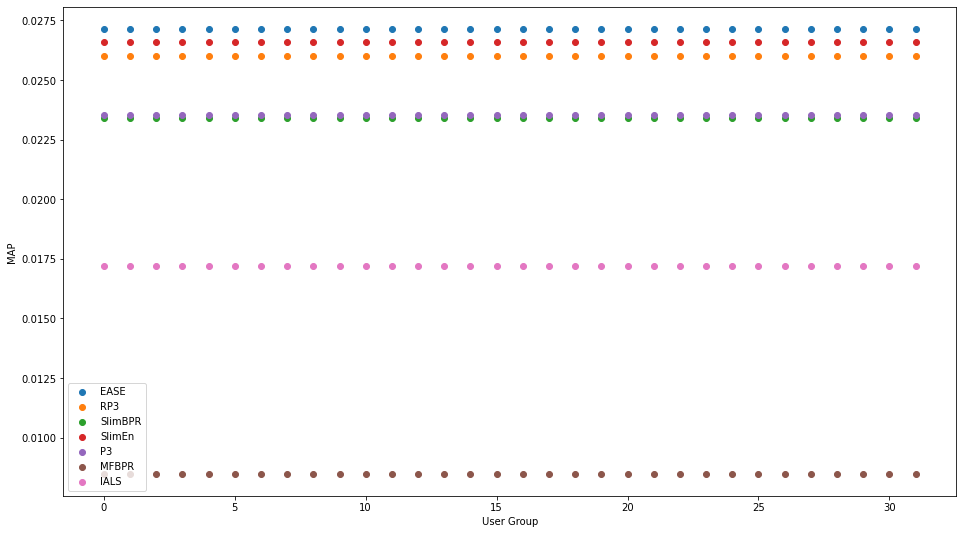

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommenders.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

In [ ]:
best_recommenders = []

for i in range(NOF_CLUSTERS):
    max_map = 0
    best_model = None
    for item in MAP_recommender_per_group.items():
        curr_map = item[1][i]
        if curr_map >= max_map:
            max_map = curr_map
            best_model = item[0]
    best_recommenders.append(nameToRecommender(best_model))
    print("( GROUP ", i, ") Best model is ", best_model, " with a MAP of ", max_map)

best_recommenders

# Version 2: Group by profile length

In [15]:
import pandas as pd
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as plt

NOF_GROUPS = 3

# Determining profile length and trying every recommender

In [21]:
profile_length = np.ediff1d(sps.csr_matrix(URM_train).indptr)
block_size = int(len(profile_length)*(1/NOF_GROUPS))
sorted_users = np.argsort(profile_length)

cutoff = 10
MAP_recommender_per_group = {}
extremes = []

from Evaluation.Evaluator import EvaluatorHoldout
evalutation_results = []

for group_id in range(0, NOF_GROUPS):

    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    extremes.append(users_in_group_p_len.max())

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))


    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    evaluator = EvaluatorHoldout(URM_valid, cutoff_list=[cutoff], ignore_users=users_not_in_group)

    for label, recommender in recommenders.items():
        result_df, _ = evaluator.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 13876, average p.len 15.68, median 16.0, min 4, max 20
EvaluatorHoldout: Ignoring 963 ( 2.3%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 27753 Users
[39727 18126 18096 ... 19407  8693 12454]
EvaluatorHoldout: Processed 13242 (100.0%) in 9.71 sec. Users per second: 1364
EvaluatorHoldout: Processed 13242 (100.0%) in 9.15 sec. Users per second: 1448
Group 1, #users in group 13876, average p.len 24.68, median 24.0, min 20, max 31
EvaluatorHoldout: Ignoring 963 ( 2.3%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 27753 Users
[41083 37420 38400 ... 19407  8693 12454]
EvaluatorHoldout: Processed 13576 (100.0%) in 10.82 sec. Users per second: 1254
EvaluatorHoldout: Processed 13576 (100.0%) in 11.01 sec. Users per second: 1234
Group 2, #users in group 13876, average p.len 54.80, median 44.0, min 31, max 1000
EvaluatorHoldout: Ignoring 963 ( 2.3%) Users that have less than 1 test interactions
EvaluatorHoldout: Ign

In [22]:
# function to get correct user group id (version 2)
def getGroupID(user):
    #calculate profile length
    profile_len = profile_length[user]
    for i in range(len(extremes)):
        if extremes[i] > profile_len:
            return i
    return NOF_GROUPS - 1

# Getting the best recommenders

In [23]:
best_recommenders = []

avg = 0
for i in range(NOF_GROUPS):
    max_map = 0
    best_model = None
    for item in MAP_recommender_per_group.items():
        #print(item)
        curr_map = item[1][i]
        if curr_map > max_map:
            max_map = curr_map
            best_model = item[0]
    avg += max_map
    best_recommenders.append(nameToRecommender(best_model))
    print("( GROUP ", i, ") Best model is ", best_model, " with a MAP of ", max_map)
print("avg MAP: ", (avg/NOF_GROUPS))
import winsound as ws
ws.Beep(200, 100)
ws.Beep(200, 100)
ws.Beep(200, 100)
ws.Beep(400, 100)
ws.Beep(100, 100)

( GROUP  0 ) Best model is  slimencold  with a MAP of  0.007654148176916587
( GROUP  1 ) Best model is  slimen  with a MAP of  0.019584236537868012
( GROUP  2 ) Best model is  slimen  with a MAP of  0.05507054418984756
avg MAP:  0.027436309634877382


# Plot the results

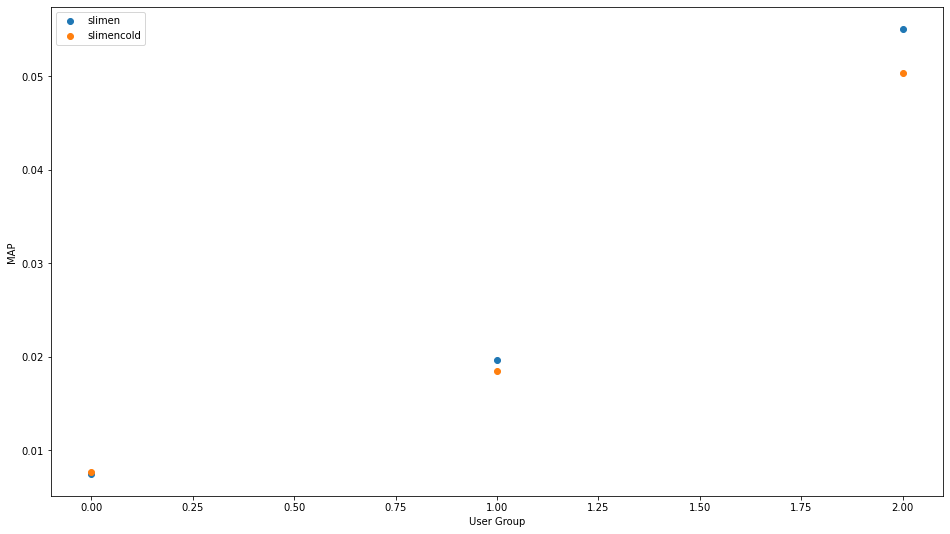

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommenders.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()


# Create the final submission (version independent)

In [25]:
test_users = pd.read_csv('../RecSys2022/data/data_target_users_test.csv')
user_id = test_users['user_id']
recommendations = []

for user in user_id:
    group_id = getGroupID(user)
    recommender = getRecommender(group_id)
    recommendations.append(recommender.recommend(user,cutoff = 10, remove_seen_flag=True))

for index in range(len(recommendations)):
    recommendations[index]=np.array(recommendations[index])

test_users['item_list']= recommendations
test_users['item_list'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in test_users['item_list']])
test_users.to_csv('submission_hybrids_all_stacked.csv', index=False)

In [26]:
ws.Beep(200, 100)
ws.Beep(200, 100)
ws.Beep(200, 100)
ws.Beep(400, 100)
ws.Beep(100, 100)